# "Melodie" generieren

Generiert eine "Melodie":

- Sie soll aus mindestens drei (Sinus-)Tönen bestehen.
- Die drei (oder mehr) Töne sollen hintereinander kommen (also einstimmig, nicht mehrstimmig).
- Die Frequenzen dieser Töne sollen unserem temperierten Stimmungssystem entsprechen.

Tipps:

- Wir haben in der gemeinsamen Sitzung gesehen, wie man Sinustöne in einen Array schreibt ( / generiert).
- np.append könnte nützlich sein.
- Siehe die Funktionen um eine Midi-Tonhöhe in Frequenz umzurechnen

<div style="background-color:lightblue">

Beispiel von Jakob:

</div>

In [1]:
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa as lr

lengths = [1, 0.5, 2]
freqs = [300, 450, 800]
sr = 44100

melody = np.array([])

t_length = 0 
for length, freq in zip(lengths, freqs): # mit zip kann man über mehrere arrays gleichzeitig iterieren
    
    # wir wollen `t` verwenden, um die einzelnen x-plot-positionen zu bestimmen
    t = np.linspace(t_length, t_length + length, int(sr * length))
    t_length += length
    
    sinus = np.sin(t * 2 * np.pi * freq)
    
    # pro Ton ein Plot (in jeweils unterschiedlicher Farbe)
    plt.plot(t, sinus)
    
    melody = np.append(melody, sinus)

plt.show()
ipd.Audio(melody, rate=sr)

<Figure size 640x480 with 1 Axes>

<div style="background-color:lightblue">

`plt.plot` kann eines, oder mehrere Argumente bekommen

`plt.plot(y)`

`plt.plot(x, y)`

</div>

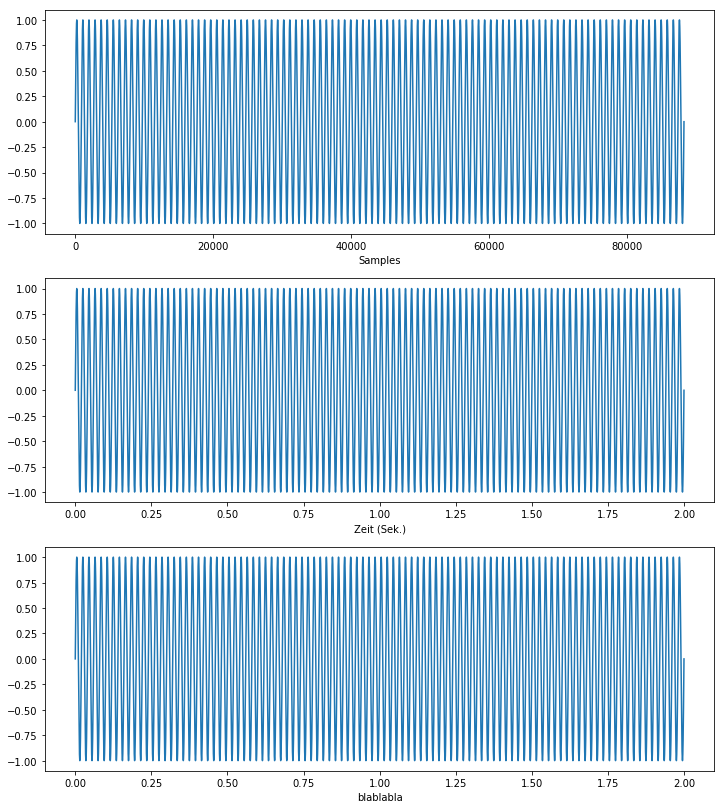

In [4]:
t = np.linspace(0, 2, 44100 * 2)
sinus = np.sin(t * 2 * np.pi * 50)

# mit `figsize` die Groesse der Graphik angeben:
plt.figure(figsize=(12, 14))

# x zeigt die Samples an
plt.subplot(3, 1, 1)
plt.plot(sinus)
plt.xlabel('Samples')

# x zeigt die Zeit an
plt.subplot(3, 1, 2)
plt.plot(t, sinus)
plt.xlabel('Zeit (Sek.)')

# plot mit random Label
plt.subplot(3, 1, 3)
plt.plot(t, sinus)
plt.xlabel('blablabla')

plt.show()

ipd.Audio(sinus, rate=44100)

# Frequenz-Modulation

Generiert einen Sinuston mit modulierter Frequenz:

- sog. Chirp (Glissando aufwärts oder abwärts), oder
- Frequenzmodulation mit einem Sinus als Modulator

Tipp:

- Bedenkt, wie numpy-Arrays miteinander verrechnet werden (element-weise)

<div style="background-color:lightblue">

Beispiel von Anselm:

</div>

In [7]:
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np

sample_rate = 44100

t = np.linspace(0, 1, sample_rate)

c_freq = 440
m_freq = 220
# m_freq = 2

# modulator
m = np.sin(2 * np.pi * m_freq * t)  # modulator with freq @220 Hz

# wenn man möchte, kann man die FM auch "anschwellen" lassen:
# m = m * np.linspace(0, 10, sample_rate)

# carrier
fm = np.sin(t * 2 * np.pi * c_freq + m)

ipd.Audio(fm, rate=sample_rate, autoplay=0)